# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Define URL, Units(type desired). and query URL

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
#Run on one, then a small sample to test (include one that doesn't exist) *comment out to run full dataset*
#cities = ["Paris", "London", "New York", "Sydney", "Buenos Aires", "Gretelcity"]
#DO NOT RUN THIS CELL AGAIN AFTER FINAL RUN TO AVOID API KEY LOCK

#Create empty lists to hold retrieved weather data
c = 1
rec = 1
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
temp = []
maxTemp = []
windSpeed = []



# Loop through the list of cities and perform a request for data on each
# Include an exception for cities not found
# Include a print log

print("Beginning Data Retrieval")
print("-------------------------")
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        maxTemp.append(response['main']['temp_max'])
        windSpeed.append(response['wind']['speed'])
        print(f"Processing Record {c} of Set {rec} | {city}.")
        c = c + 1
        if c == 50:
            rec = rec + 1
            c = 1
            time.sleep(60)
    except(KeyError):
        print("City not found. Skipping...")
        
    #print(response)
print("-----------------------")  
print("Data Retrieval Complete")
print("-----------------------")  


Beginning Data Retrieval
-------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | barrow.
Processing Record 2 of Set 1 | albany.
Processing Record 3 of Set 1 | peniche.
Processing Record 4 of Set 1 | buchanan.
Processing Record 5 of Set 1 | uvira.
Processing Record 6 of Set 1 | arraial do cabo.
Processing Record 7 of Set 1 | chester.
Processing Record 8 of Set 1 | puerto ayora.
Processing Record 9 of Set 1 | khabary.
Processing Record 10 of Set 1 | bluff.
Processing Record 11 of Set 1 | yellowknife.
Processing Record 12 of Set 1 | ceska lipa.
Processing Record 13 of Set 1 | hobart.
City not found. Skipping...
City not found. Skipping...
Processing Record 14 of Set 1 | provideniya.
Processing Record 15 of Set 1 | khatanga.
Processing Record 16 of Set 1 | warwick.
Processing Record 17 of Set 1 | victoria.
Processing Record 18 of Set 1 | libreville.
Processing Record 19 of Set 1 | ushuaia.
Processing Record 20 of Set 1 | surt.
Processing Record 21 of Set 1 | sa

Processing Record 32 of Set 4 | port elizabeth.
Processing Record 33 of Set 4 | svetlyy.
Processing Record 34 of Set 4 | saldanha.
Processing Record 35 of Set 4 | sao filipe.
Processing Record 36 of Set 4 | kodiak.
Processing Record 37 of Set 4 | half moon bay.
Processing Record 38 of Set 4 | kenai.
Processing Record 39 of Set 4 | hay river.
Processing Record 40 of Set 4 | necochea.
Processing Record 41 of Set 4 | alice springs.
Processing Record 42 of Set 4 | gat.
Processing Record 43 of Set 4 | tazovskiy.
Processing Record 44 of Set 4 | ahuimanu.
Processing Record 45 of Set 4 | prince albert.
Processing Record 46 of Set 4 | shimoda.
Processing Record 47 of Set 4 | ust-barguzin.
Processing Record 48 of Set 4 | tuatapere.
Processing Record 49 of Set 4 | northam.
Processing Record 1 of Set 5 | cayenne.
Processing Record 2 of Set 5 | quatre cocos.
Processing Record 3 of Set 5 | longyearbyen.
Processing Record 4 of Set 5 | torbay.
Processing Record 5 of Set 5 | camargo.
Processing Record 

Processing Record 17 of Set 8 | nemuro.
Processing Record 18 of Set 8 | quelimane.
Processing Record 19 of Set 8 | miraflores.
Processing Record 20 of Set 8 | bela.
Processing Record 21 of Set 8 | nantucket.
Processing Record 22 of Set 8 | saint-joseph.
Processing Record 23 of Set 8 | raudeberg.
Processing Record 24 of Set 8 | padang.
Processing Record 25 of Set 8 | sola.
Processing Record 26 of Set 8 | parabel.
City not found. Skipping...
Processing Record 27 of Set 8 | karangampel.
Processing Record 28 of Set 8 | robertsport.
Processing Record 29 of Set 8 | upington.
Processing Record 30 of Set 8 | poum.
Processing Record 31 of Set 8 | pemba.
Processing Record 32 of Set 8 | ler.
Processing Record 33 of Set 8 | kieta.
Processing Record 34 of Set 8 | barra dos coqueiros.
Processing Record 35 of Set 8 | churapcha.
Processing Record 36 of Set 8 | hatillo.
Processing Record 37 of Set 8 | batemans bay.
Processing Record 38 of Set 8 | roma.
Processing Record 39 of Set 8 | sibenik.
Processin

Processing Record 8 of Set 12 | severo-kurilsk.
Processing Record 9 of Set 12 | alexandria.
Processing Record 10 of Set 12 | arvika.
City not found. Skipping...
Processing Record 11 of Set 12 | oussouye.
Processing Record 12 of Set 12 | bubaque.
Processing Record 13 of Set 12 | xichang.
Processing Record 14 of Set 12 | zhuhai.
-----------------------
Data Retrieval Complete
-----------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_df = pd.DataFrame({"City":city_name,
                        "Date":date,
                        "Country":country,
                        "Lat":lat,
                        "Lon":lon,
                        "Temp":temp,
                        "Max Temp":maxTemp, 
                        "Humidity":humidity,
                        "Wind Speed":windSpeed,
                        "Cloudiness":cloudiness
                                         })
cities_df

,City,Date,Country,Lat,Lon,Temp,Max Temp,Humidity,Wind Speed,Cloudiness
0,Barrow,1586804898,US,71.29,-156.79,23.00,23.00,92,9.17,90
1,Albany,1586804651,US,42.60,-73.97,60.39,63.00,82,21.92,90
2,Peniche,1586804898,PT,39.36,-9.38,56.28,59.00,62,4.70,40
3,Buchanan,1586804870,LR,5.88,-10.05,84.20,84.20,83,9.17,40
4,Uvira,1586804898,CD,-3.41,29.15,74.12,74.12,50,0.98,97
...,...,...,...,...,...,...,...,...,...,...
548,Arvika,1586805629,SE,59.66,12.59,35.96,37.00,37,17.22,93
549,Oussouye,1586805629,SN,12.48,-16.55,82.40,82.40,65,6.93,72
550,Bubaque,1586805630,GW,11.28,-15.83,80.01,80.01,71,14.18,4
551,Xichang,1586805630,CN,27.90,102.26,53.01,53.01,62,1.61,100


In [7]:
#Exporting data to csv file
cities_df.to_csv("cities_weather.csv")

In [8]:
#Convert date from UNIX to normal timestamp using datetime
ts = cities_df["Date"][0]
convert_ts = datetime.utcfromtimestamp(ts)
short_ts = convert_ts.date()
cities_df["Date"]= short_ts


cities_df.head()


,City,Date,Country,Lat,Lon,Temp,Max Temp,Humidity,Wind Speed,Cloudiness
0,Barrow,2020-04-13,US,71.29,-156.79,23.00,23.00,92,9.17,90
1,Albany,2020-04-13,US,42.60,-73.97,60.39,63.00,82,21.92,90
2,Peniche,2020-04-13,PT,39.36,-9.38,56.28,59.00,62,4.70,40
3,Buchanan,2020-04-13,LR,5.88,-10.05,84.20,84.20,83,9.17,40
4,Uvira,2020-04-13,CD,-3.41,29.15,74.12,74.12,50,0.98,97


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

####Latitude vs. Temperature Plot

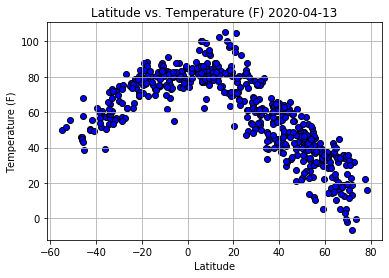

In [9]:
plt.scatter(cities_df["Lat"], cities_df["Temp"], marker = "o", color = "blue", edgecolor = "black")
plt.grid()
plt.title(f"Latitude vs. Temperature (F) {short_ts}")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig("LatVsTempPlot")
plt.show()

Observations (Correlation Exists)
Based on the sample data and corresponding graph above, we can see that Temperature increases as the Latitude of any given location approaches 0(the equator), and inversely, the temperature decreases as we move away from the equator. 

#### Latitude vs. Humidity Plot

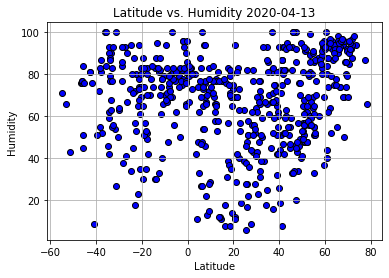

In [10]:
plt.scatter(cities_df["Lat"], cities_df["Humidity"], marker = "o", color = "blue", edgecolor = "black")
plt.grid()
plt.title(f"Latitude vs. Humidity {short_ts}")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("LatVsHumidityPlot")
plt.show()

Observations (No Correlation)
Based on the graph above, there does not seem to be any obvious correlation between latitude and humidity levels in this sample. 

#### Latitude vs. Cloudiness Plot

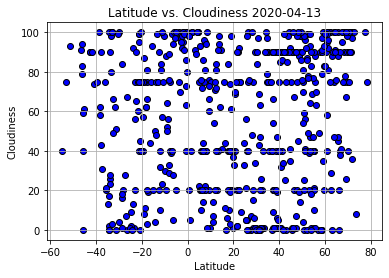

In [11]:
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"], marker = "o", color = "blue", edgecolor = "black")
plt.grid()
plt.title(f"Latitude vs. Cloudiness {short_ts}")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("LatVsCloudinessPlot")
plt.show()

Observations (No correlation)
In this sample, there does not appear to be any correlation between latitude and cloudiness. 

#### Latitude vs. Wind Speed Plot

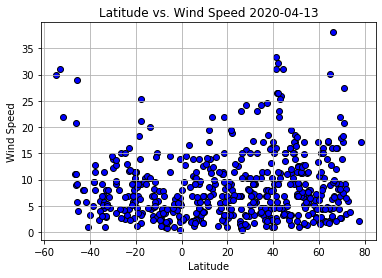

In [12]:
plt.scatter(cities_df["Lat"], cities_df["Wind Speed"], marker = "o", color = "blue", edgecolor = "black")
plt.grid()
plt.title(f"Latitude vs. Wind Speed {short_ts}")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("LatVsWindSpeedPlot")
plt.show()

Observations (No Correlation)
This sample does not show any sign of correlation between latitude and wind speed. 

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots


In [14]:
# Create Northern and Southern Hemisphere DataFrames
nh_df = cities_df.loc[pd.to_numeric(cities_df["Lat"]).astype(float) > 0, :]
sh_df = cities_df.loc[pd.to_numeric(cities_df["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -1.05x +95.43
The r-squared is: 0.7864875174736595


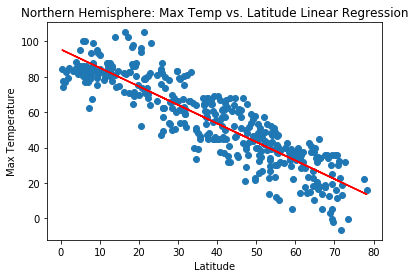

In [25]:
# Create x- and y-values containing relevant data
x_values = pd.to_numeric(nh_df['Lat']).astype(float)
y_values = pd.to_numeric(nh_df['Max Temp']).astype(float)

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Northern Hemisphere: Max Temp vs. Latitude Linear Regression')
#plt.text(0,0,line_eq,fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save figure image
plt.savefig("Lat_vs_MaxTemp_NH_LinRegress")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.65x +85.31
The r-squared is: 0.5916019319798785


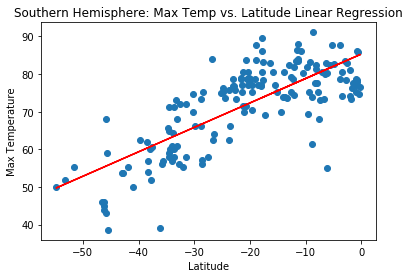

In [26]:
# Create x- and y-values containing relevant data
x_values = pd.to_numeric(sh_df['Lat']).astype(float)
y_values = pd.to_numeric(sh_df['Max Temp']).astype(float)

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('Southern Hemisphere: Max Temp vs. Latitude Linear Regression')
#plt.annotate(line_eq,(0,0),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save figure image
plt.savefig("Lat_vs_MaxTemp_SH_LinRegress")

# Show plot
plt.show()

Observations- Strong correlation for both graphs. 
This pair of graphs show that there is a strong relationship between latitude and Max Temperature; as the latitude approaches the equator, the max temperature increases; and as you move away from the equator, the max temperature decreases. 


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.41x +49.61
The r-squared is: 0.12732588741922965


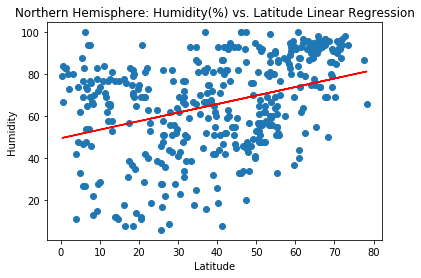

In [27]:
# Create x- and y-values containing relevant data
x_values = pd.to_numeric(nh_df['Lat']).astype(float)
y_values = pd.to_numeric(nh_df['Humidity']).astype(float)

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere: Humidity(%) vs. Latitude Linear Regression')
#plt.annotate(line_eq,(0,0),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save figure image
plt.savefig("Lat_vs_Humidity_NH_LinRegress")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.19x +74.74
The r-squared is: 0.019931880696850788


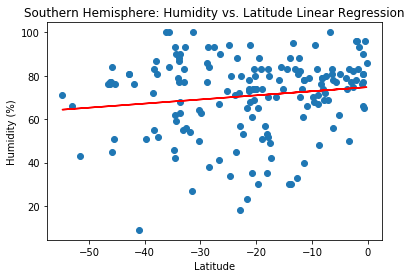

In [28]:
# Create x- and y-values containing relevant data
x_values = pd.to_numeric(sh_df['Lat']).astype(float)
y_values = pd.to_numeric(sh_df['Humidity']).astype(float)

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere: Humidity vs. Latitude Linear Regression')
#plt.annotate(line_eq,(0,0),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save figure image
plt.savefig("Lat_vs_Humidity_SH_LinRegress")

# Show plot
plt.show()

Observations- No correlation. This pair of graphs does not show a correlation; in the northern hemisphere, the humidity appears to increase when moving away from the equator, while the opposite is true for the southern hemisphere. However, a large portion of the data does not match either trendline and prevents a valid conclusion from being drawn based on this sample. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.36x +41.97
The r-squared is: 0.04221535747425853


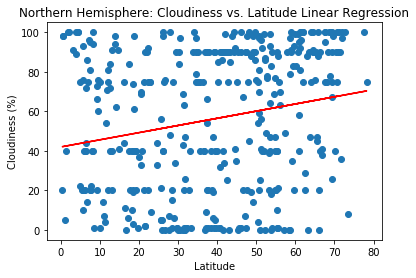

In [29]:
# Create x- and y-values containing relevant data
x_values = pd.to_numeric(nh_df['Lat']).astype(float)
y_values = pd.to_numeric(nh_df['Cloudiness']).astype(float)

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere: Cloudiness vs. Latitude Linear Regression')
#plt.annotate(line_eq,(0,0),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save figure image
plt.savefig("Lat_vs_Cloudiness_NH_LinRegress")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.43x +67.95
The r-squared is: 0.02915153722147162


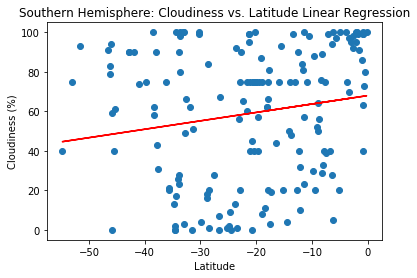

In [30]:
# Create x- and y-values containing relevant data
x_values = pd.to_numeric(sh_df['Lat']).astype(float)
y_values = pd.to_numeric(sh_df['Cloudiness']).astype(float)

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere: Cloudiness vs. Latitude Linear Regression')
#plt.annotate(line_eq,(0,0),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save figure image
plt.savefig("Lat_vs_Cloudiness_SH_LinRegress")

# Show plot
plt.show()

Observations- These two graphs do not show any conclusive correlation between cloudiness and latitude. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.03x +7.69
The r-squared is: 0.009788345284594904


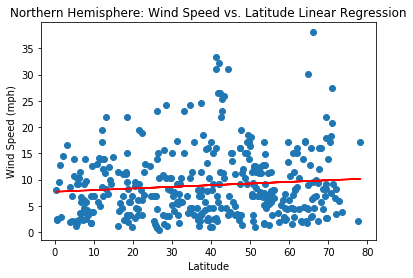

In [31]:
# Create x- and y-values containing relevant data
x_values = pd.to_numeric(nh_df['Lat']).astype(float)
y_values = pd.to_numeric(nh_df['Wind Speed']).astype(float)

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere: Wind Speed vs. Latitude Linear Regression')
#plt.annotate(line_eq,(0,0),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Save figure image
plt.savefig("Lat_vs_WindSpeed_NH_LinRegress")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.14x +4.57
The r-squared is: 0.12527032685018552


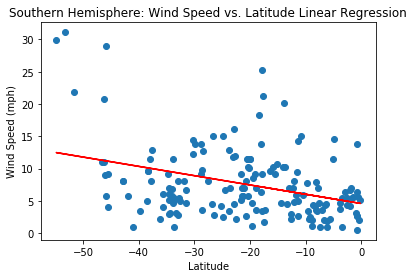

In [32]:
# Create x- and y-values containing relevant data
x_values = pd.to_numeric(sh_df['Lat']).astype(float)
y_values = pd.to_numeric(sh_df['Wind Speed']).astype(float)

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Print r square value
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere: Wind Speed vs. Latitude Linear Regression')
#plt.annotate(line_eq,(0,0),fontsize=15,color="red")

# Save figure image
plt.savefig("Lat_vs_WindSpeed_SH_LinRegress")


# Show plot
plt.show()

Observations- These two graphs do not show any conclusive correlation between wind speed and latitude.